# 选取指标

## 短期渠道评分体系

关键行为分：根据留存魔法数字确定关键行为

变现能力分：使用时长、广告展现次数、启动次数、PV

用户构成：老用户占比

归因得分：模糊归因占比、归因失败占比

数量分：按照数量多少打分

### 关键行为确定

根据留存魔法数字确定关键行为。留存魔法数字：找到影响用户留存的最关键变量，之后改善这个变量的数值，从而达到改善留存的目的。比如我们发现：一周内点击分享5次及以上的用户，留存率明显高出30%，所以我们就定5次为魔法数字，然后想办法让用户多分享。

具体操作分3步：

列出可采集数据的用户行为

分析行为与留存率关系，找出高度相关行为

得出合适做改善行为的魔法数字

In [2]:
# 导入库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pyecharts import options as opts
from pyecharts.charts import Radar

# 中文乱码的处理
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']# 设置微软雅黑字体
# 忽略警告
warnings.filterwarnings("ignore")

In [3]:
# 读取数据
key_action_data = pd.read_excel('key_action.xls')
key_action_data.head()

,key_action,key_action_cnt,retention_rate
0,收藏,1,0.002
1,收藏,2,0.025
2,收藏,3,0.027
3,收藏,4,0.029
4,收藏,5,0.150


In [4]:
# 查看关键行为值
key_action_data['key_action'].unique()

array(['收藏', '分享', '更换模板', '消息互动'], dtype=object)

In [5]:
# 收藏数
collection_cnt = key_action_data[key_action_data['key_action'] == '收藏']
# 分享数
share_cnt = key_action_data[key_action_data['key_action'] == '分享']
# 更换模板数
model_change_cnt = key_action_data[key_action_data['key_action'] == '更换模板']
# 消息互动数
message_cnt = key_action_data[key_action_data['key_action'] == '消息互动']

In [6]:
# 收藏数与留存的相关性
corr1 = collection_cnt.corr()
corr1

,key_action_cnt,retention_rate
key_action_cnt,1.000000,0.814472
retention_rate,0.814472,1.000000


In [7]:
# 分享数和留存率的相关性
corr2 = share_cnt.corr()
corr2

,key_action_cnt,retention_rate
key_action_cnt,1.000000,0.926569
retention_rate,0.926569,1.000000


In [8]:
# 更换模板数和留存率的相关性
corr3 = model_change_cnt.corr()
corr3

,key_action_cnt,retention_rate
key_action_cnt,1.00000,0.85967
retention_rate,0.85967,1.00000


In [9]:
# 消息互动数和留存率的相关性
corr4 = message_cnt.corr()
corr4

,key_action_cnt,retention_rate
key_action_cnt,1.000000,0.539625
retention_rate,0.539625,1.000000


相关系数r的绝对值一般在0.8以上，认为A和B有强的相关性。0.3到0.8之间，可以认为有弱的相关性。0.3以下，认为没有相关性。

所以这四个变量中取前与留存率强相关的三个指标:收藏数、分享数、更换模板数

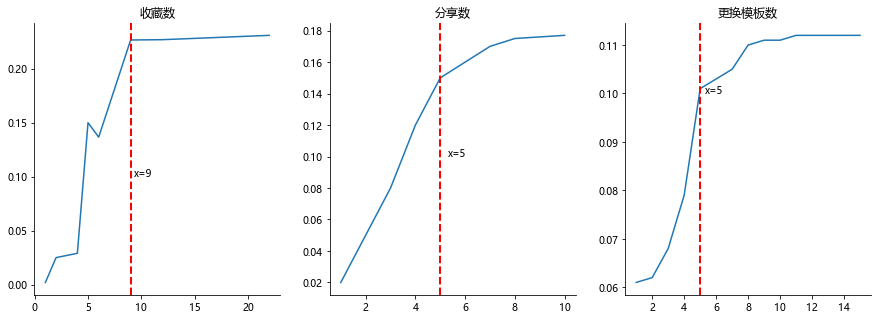

In [10]:
# 绘图
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax1,ax2,ax3 = ax.flatten()

#收藏数
#设置数据
x1 = collection_cnt['key_action_cnt']
y1 = collection_cnt['retention_rate']
#绘制折线图
ax1.plot(x1,y1)
#绘制辅助线
ax1.axvline(x=9,c="r",ls="--",lw=2)
ax1.text(9.3,0.10,'x=9')
#消除左右边框
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.set_title('收藏数')

#分享数
#设置数据
x1 = share_cnt['key_action_cnt']
y1 = share_cnt['retention_rate']
#绘制折线图
ax2.plot(x1,y1)
#绘制辅助线
ax2.axvline(x=5,c="r",ls="--",lw=2)
ax2.text(5.3,0.10,'x=5')
#消除左右边框
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.set_title('分享数')

#更换模板数
#设置数据
x1 = model_change_cnt['key_action_cnt']
y1 = model_change_cnt['retention_rate']
#绘制折线图
ax3.plot(x1,y1)
#绘制辅助线
ax3.axvline(x=5,c="r",ls="--",lw=2)
ax3.text(5.3,0.10,'x=5')
#消除左右边框
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.set_title('更换模板数')

plt.show()

所以确定关键行为标准：收藏数9，分享数5，更换模板数5为关键行为。

# 指标筛选

目前我们对于变现能力分的评价有4个指标，我们想要对指标进行筛选，用更少的指标计算变现能力分


In [11]:
# 读取数据
revenue_ability_data = pd.read_csv('revenue_ability_data.csv')[['user_id','launch_cnt','PV','ad_show_cnt','duration']]
revenue_ability_data

,user_id,launch_cnt,PV,ad_show_cnt,duration
0,0,2,0,1,3056
1,1,2,0,4,0
2,2,2,0,3,0
3,3,5,15,5,312980
4,4,11,1,18,127880
...,...,...,...,...,...
62336,62336,23,4,8,573997
62337,62337,2,0,6,0
62338,62338,2,0,9,0
62339,62339,2,0,6,0


<AxesSubplot:>

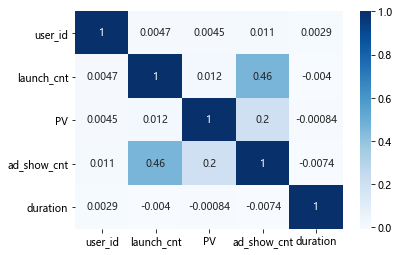

In [12]:
# 绘制变现能力指标的相关性矩阵
corr_revenue_ability_data = revenue_ability_data.corr()
sns.heatmap(corr_revenue_ability_data, cmap='Blues', annot=True)

从上面的矩阵我们可以看出来的是：启动数与广告展示数呈现弱相关，其他指标之间没有相关性,所以我们需要对这四个指标进行权重打分。

# 权重打分

In [13]:
# 读取数据
index_weight_raw = pd.read_excel('权重打分表.xls',index_col='Z')
index_weight_raw

,launch_cnt,PV,ad_show_cnt,duration
Z,,,,
launch_cnt,1,0.5,0.3333,0.2000
PV,2,1.0,0.5000,0.2500
ad_show_cnt,3,2.0,1.0000,0.3333
duration,5,4.0,3.0000,1.0000


In [14]:
# 列向量归一化
index_weight = index_weight_raw.apply(lambda x : x/x.sum())
index_weight

,launch_cnt,PV,ad_show_cnt,duration
Z,,,,
launch_cnt,0.090909,0.066667,0.068959,0.112152
PV,0.181818,0.133333,0.103449,0.140190
ad_show_cnt,0.272727,0.266667,0.206898,0.186901
duration,0.454545,0.533333,0.620694,0.560758


In [15]:
# 行求和
index_weight['row_sum'] = index_weight.apply(lambda x : x.sum(),axis=1)
index_weight

,launch_cnt,PV,ad_show_cnt,duration,row_sum
Z,,,,,
launch_cnt,0.090909,0.066667,0.068959,0.112152,0.338686
PV,0.181818,0.133333,0.103449,0.140190,0.558790
ad_show_cnt,0.272727,0.266667,0.206898,0.186901,0.933193
duration,0.454545,0.533333,0.620694,0.560758,2.169331


In [16]:
# 求和项归一
index_weight['normalization'] = index_weight[['row_sum']].apply(lambda x :x/x.sum())
index_weight

,launch_cnt,PV,ad_show_cnt,duration,row_sum,normalization
Z,,,,,,
launch_cnt,0.090909,0.066667,0.068959,0.112152,0.338686,0.084672
PV,0.181818,0.133333,0.103449,0.140190,0.558790,0.139698
ad_show_cnt,0.272727,0.266667,0.206898,0.186901,0.933193,0.233298
duration,0.454545,0.533333,0.620694,0.560758,2.169331,0.542333


使用时长权重：0.542333

广告展现次数权重：0.233298

启动次数权重：0.084672

PV权重：0.139698

###  一致性检验
·一般认为一致性比率CR<0.1时，认为A的不一致程度在容许范围之内，有满意的一致性，通过一致性检验。

·CR = CI/RI

·CI = (λ-n)/(n-1)

·n是特征数量，n=4

·λ = 1/n(AW1/W1+AW2/W2+...+AWi/Wi)

·行向量求和、经归一化（使向量中各元素之和为1）后记为W

·A是原始的打分表数据

In [17]:
# 一致性检验计算-计算AW
AW1 = index_weight_raw.iloc[0,0]*index_weight.iloc[0,5]+index_weight_raw.iloc[0,1]*index_weight.iloc[1,5]+index_weight_raw.iloc[0,2]*index_weight.iloc[2,5]+index_weight_raw.iloc[0,3]*index_weight.iloc[3,5]
AW2 = index_weight_raw.iloc[1,0]*index_weight.iloc[0,5]+index_weight_raw.iloc[1,1]*index_weight.iloc[1,5]+index_weight_raw.iloc[1,2]*index_weight.iloc[2,5]+index_weight_raw.iloc[1,3]*index_weight.iloc[3,5]
AW3 = index_weight_raw.iloc[2,0]*index_weight.iloc[0,5]+index_weight_raw.iloc[2,1]*index_weight.iloc[1,5]+index_weight_raw.iloc[2,2]*index_weight.iloc[2,5]+index_weight_raw.iloc[2,3]*index_weight.iloc[3,5]
AW4 = index_weight_raw.iloc[3,0]*index_weight.iloc[0,5]+index_weight_raw.iloc[3,1]*index_weight.iloc[1,5]+index_weight_raw.iloc[3,2]*index_weight.iloc[2,5]+index_weight_raw.iloc[3,3]*index_weight.iloc[3,5]

In [18]:
print(f'AW1={AW1}')
print(f'AW2={AW2}')
print(f'AW3={AW3}')
print(f'AW4={AW4}')

AW1=0.34074519327536157
AW2=0.5612730068619691
AW3=0.947467529058454
AW4=2.2243753172453293


In [19]:
# 计算λ
lambda_ = 1/4*(AW1/index_weight.iloc[0,5]+AW2/index_weight.iloc[1,5]+AW3/index_weight.iloc[2,5]+AW4/index_weight.iloc[3,5])
lambda_

4.051192777069623

In [20]:
# 计算CI
CI = (lambda_-4)/(4-1)
CI

0.01706425902320774

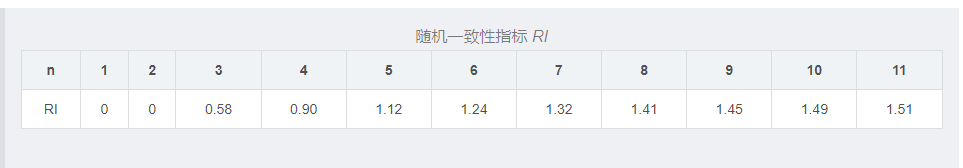

In [21]:
# 计算CR
RI = 0.90
CR = CI/RI
CR <0.1

True

所以判断矩阵的不一致程度在容许范围之内，有满意的一致性，通过一致性检验。

# 结果呈现

## 评判维度

1.关键行为分：根据关键行为占比的大小，

2.变现能力分：使用时长、广告展现次数、启动次数、PV的权重评分

3.用户构成：老用户占比评分

4.归因得分：根据模糊归因占比、归因失败占比评分（权重0.5：0.5）

5.数量分：按照数量多少打分

In [22]:
# 读取数据
score_data = pd.read_excel('score_data.xlsx')
score_data

,channel,new_user_rate,key_action_rate,success_attribute_rate,accurate_attribute_rate,total_user,duration_avg,ad_show_cnt_avg,launch_cnt_avg,PV_avg
0,huawei,0.80,0.5,0.95,0.75,15000,1520,25,10,5
1,xiaomi,0.80,0.3,0.92,0.58,12300,2540,23,8,4
2,oppo,0.93,0.2,0.94,0.64,14580,1020,45,14,7
3,vivo,0.60,0.1,0.91,0.75,8525,7890,40,20,9
4,meizu,0.70,0.2,0.85,0.80,1202,1023,12,12,4


In [23]:
# 构造打分公式
def score(column):
    score = (column-column.min())/(column.max()-column.min())*100
    return score

# 对每列进行打分
score_data[['new_user_rate','key_action_rate','success_attribute_rate','accurate_attribute_rate','total_user','duration_avg','ad_show_cnt_avg','launch_cnt_avg','PV_avg']] = score_data[['new_user_rate','key_action_rate','success_attribute_rate','accurate_attribute_rate','total_user','duration_avg','ad_show_cnt_avg','launch_cnt_avg','PV_avg']].apply(score).astype('int64')
score_data


,channel,new_user_rate,key_action_rate,success_attribute_rate,accurate_attribute_rate,total_user,duration_avg,ad_show_cnt_avg,launch_cnt_avg,PV_avg
0,huawei,60,100,100,77,100,7,39,16,20
1,xiaomi,60,49,70,0,80,22,33,0,0
2,oppo,100,25,89,27,96,0,100,50,60
3,vivo,0,0,60,77,53,100,84,100,100
4,meizu,30,25,0,100,0,0,0,33,0


In [24]:
score_data_final = pd.DataFrame()

# 关键行为分
score_data_final[['channel','key_action_score']] = score_data[['channel','key_action_rate']]

# 变现能力分
score_data_final['revenue_ability_score'] = score_data['duration_avg']*0.54+score_data['ad_show_cnt_avg']*0.23+score_data['launch_cnt_avg']*0.09+score_data['PV_avg']*0.14

# 用户构成分
score_data_final['user_compose_score'] = score_data['new_user_rate']

# 归因得分
score_data_final['contribute_score'] = score_data['success_attribute_rate']*0.5+score_data['accurate_attribute_rate']*0.5

# 数量分
score_data_final['user_count_score'] = score_data['total_user']

# 得分表
score_data_final

,channel,key_action_score,revenue_ability_score,user_compose_score,contribute_score,user_count_score
0,huawei,100,16.99,60,88.5,100
1,xiaomi,49,19.47,60,35.0,80
2,oppo,25,35.90,100,58.0,96
3,vivo,0,96.32,0,68.5,53
4,meizu,25,2.97,30,50.0,0


In [25]:
data = [100,16.99,60,88.5,100]

In [26]:
c_schema = [
    {"name": "key_action_score", "max": 100, "min": 0},
    {"name": "revenue_ability_score", "max": 100, "min": 0},
    {"name": "user_compose_score", "max": 100, "min": 0},
    {"name": "contribute_score", "max": 100,"min": 0},
    {"name": "user_count_score", "max": 100,"min": 0},
]

c = (
    Radar()
    .set_colors(["#4587E7","#FFB6C1","#BA55D3","#7FFFAA","#F0E68C"])
    .add_schema(
        schema=c_schema,
        shape="circle",
        center=["50%", "50%"],
        radius="80%",
        angleaxis_opts=opts.AngleAxisOpts(
            min_=0,
            max_=100,
            is_clockwise=False,
            interval=20,
            axistick_opts=opts.AxisTickOpts(is_show=False),
            axislabel_opts=opts.LabelOpts(is_show=False),
            axisline_opts=opts.AxisLineOpts(is_show=False),
            splitline_opts=opts.SplitLineOpts(is_show=False),
        ),
        radiusaxis_opts=opts.RadiusAxisOpts(
            min_=0,
            max_=100,
            interval=20,
            splitarea_opts=opts.SplitAreaOpts(
                is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1)
            ),
        ),
        polar_opts=opts.PolarOpts(),
        splitarea_opt=opts.SplitAreaOpts(is_show=False),
        splitline_opt=opts.SplitLineOpts(is_show=False),
    )
    .add(
        series_name="huawei",
        data=[{'value':[100,16.99,60,88.5,100],'name':'huawei'}],
        color="#4587E7",
        areastyle_opts=opts.AreaStyleOpts(opacity=0.1),
        linestyle_opts=opts.LineStyleOpts(width=1),
    )
        .add(
        series_name="xiaomi",
        data=[{'value':[49,19.47,60,35.0,80],'name':'xiaomi'}],
        color="#FFB6C1",
        areastyle_opts=opts.AreaStyleOpts(opacity=0.1),
        linestyle_opts=opts.LineStyleOpts(width=1),
    )
         .add(
        series_name="oppo",
        data=[{'value':[25, 35.9, 100, 58.0, 96],'name':'oppo'}],
        color="#BA55D3",
        areastyle_opts=opts.AreaStyleOpts(opacity=0.1),
        linestyle_opts=opts.LineStyleOpts(width=1),
    )
         .add(
        series_name="vivo",
        data=[{'value':[0, 96.32, 0, 68.5, 53],'name':'vivo'}],
        color="#7FFFAA",
        areastyle_opts=opts.AreaStyleOpts(opacity=0.1),
        linestyle_opts=opts.LineStyleOpts(width=1),
    )
         .add(
        series_name="meizu",
        data=[{'value':[25, 2.96, 30, 50.0, 0],'name':'meizu'}],
        color="#F0E68C",
        areastyle_opts=opts.AreaStyleOpts(opacity=0.1),
        linestyle_opts=opts.LineStyleOpts(width=1),
    )
)

c.render_notebook()